In [1]:
# Add root folder to python path
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))

# Add some common packages
import numpy as np
import pandas as pd
import math
import scipy.stats as ss
from matplotlib import pyplot as plt

In [2]:
# Set up the failure mode class
from pof.failure_mode import FailureMode

fm = FailureMode(alpha=50, beta=1.5, gamma=10)

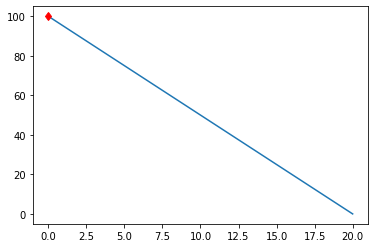

In [3]:

for condition in fm.conditions:
    condition.set_condition_profile()
    condition.plot_condition_profile()

In [20]:
t_start = 0
t_end = 50

timeline = dict()

# Get intiaition
tl_i = np.full(t_end + 1, fm._initiated)
t_initiate = 0
if not fm._initiated:
    t_initiate = int(fm.init_dist.sample())
    tl_i[t_initiate:] = 1

timeline ['initiated'] = tl_i

# Get condtiion
for condition in fm.conditions: 
    timeline[condition.name] = condition.get_condition_profile(t_start=-t_initiate, t_stop=t_end - t_initiate)

# Check time based tasks
for task in fm.tasks:

    if task.trigger == 'time': 
        tl_tt = task.sim_timeline(t_end)
        timeline[task.activity] = tl_tt

# Check detection
if fm._detected:
    timeline['detection'] = np.full(t_end + 1, True)
else:
    timeline['detection'] = fm.inspection.sim_completion(t_end, timeline)

# Check failure
timeline['failure'] = np.full(t_end + 1, fm._failed)
if not fm._failed:
    for condition in fm.conditions:
        tl_f = condition.sim_failure_timeline(t_start = - t_initiate, t_stop = t_end)
        timeline['failure'] = (timeline['failure']) | (tl_f)

In [25]:
timeline

{'initiated': array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True]),
 'wall_thickness': array([100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        100., 100., 100., 100.,  95.,  90.,  85.,  80.,  75.,  70.,  65.,
         60.,  55.,  50.,  45.,  40.,  35.,  30.,  25.,  20.,  15.,  10.,
          5.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 'replace': NotImplemented,
 'inspection': array([5., 4., 3., 2., 1., 0., 4., 3., 2., 1., 0., 4., 3., 2., 1., 0., 4.,
        3., 2., 1., 0., 4., 3., 2., 1., 0., 4., 3., 2., 1., 0., 4., 3., 2.,
        1., 0., 4., 

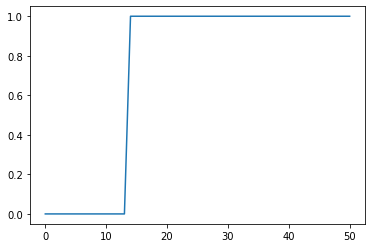

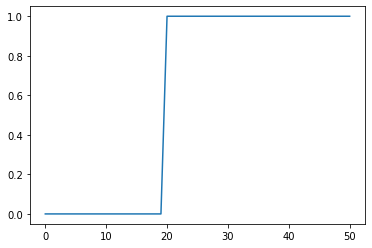

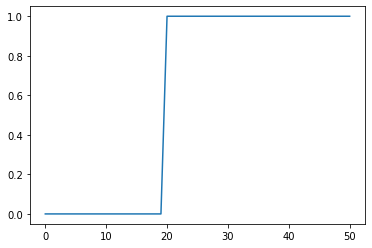

In [29]:
plt.plot(timeline['initiated'])
plt.show()
plt.plot(timeline['detection'])
plt.show()
plt.plot(timeline['failure'])
plt.show()

In [19]:
schedule

array([0., 4., 3., 2., 1., 0., 4., 3., 2., 1., 0., 4., 3., 2., 1., 0., 4.,
       3., 2., 1., 0., 4., 3., 2., 1., 0., 4., 3., 2., 1., 0., 4., 3., 2.,
       1., 0., 4., 3., 2., 1., 0., 4., 3., 2., 1., 0., 4., 3., 2., 1., 0.,
       4., 3.])